In [32]:
%load_ext autoreload
%autoreload 2

import sys, os, glob
import pandas as pd
import numpy as np
import pickle

from matplotlib import ticker, cm, colors
from matplotlib.lines import Line2D
import matplotlib
import matplotlib.pyplot as plt

from scipy.interpolate import griddata as scipyGrid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# import plotting utils
sys.path.append( "/data/user/tvaneede/utils" )

from FlavourScansPlotting import get_contour_points, plot_confidence_intervals

# load and set matplotlib parameters
%matplotlib inline

In [34]:
plotting_path = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/notebooks/retrain_zheyang/plots"
os.system(f"mkdir -p {plotting_path}")

0

In [35]:
from NNMFit.utilities import ScanHandler

In [36]:
import matplotlib as mpl

rcParams = {
            "axes.titlesize": 16,
            "axes.labelsize": 14,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            }

mpl.rcParams.update(rcParams)

In [62]:
benchmark_path = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/recreate_neha_benchmark/output"
base_path = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/retrain_zheyang/output"

scan_dir_dict = {
                 "HESEBestfit_nosyst"        : f"{benchmark_path}/asimov_SAY_HESEBestfit_NoSystematics",
                 "taureco_v4_FinalTopology_muonTemplateTrack"        : f"{benchmark_path}/taureco_v4_FinalTopology_muonTemplateTrack",

                # based on length > 10 m, E > 60e3 optimization
                 "taureco_v4_retrain_zheyang_length-10_energy-60e3_v0"        : f"{base_path}/taureco_v4_retrain_zheyang_length-10_energy-60e3_v0",
                 "taureco_v4_retrain_zheyang_length-10_energy-60e3_v1"        : f"{base_path}/taureco_v4_retrain_zheyang_length-10_energy-60e3_v1",
                 "taureco_v4_retrain_zheyang_length-10_energy-60e3_v2"        : f"{base_path}/taureco_v4_retrain_zheyang_length-10_energy-60e3_v2",
                 "taureco_v4_retrain_zheyang_length-10_energy-60e3_v3"        : f"{base_path}/taureco_v4_retrain_zheyang_length-10_energy-60e3_v3",
                 "taureco_v4_retrain_zheyang_length-10_energy-60e3_v4"        : f"{base_path}/taureco_v4_retrain_zheyang_length-10_energy-60e3_v4",
                
                # without energy used in the optimization
                 "taureco_v4_retrain_zheyang_length-10_v0"        : f"{base_path}/taureco_v4_retrain_zheyang_length-10_v0",
                 "taureco_v4_retrain_zheyang_length-10_v1"        : f"{base_path}/taureco_v4_retrain_zheyang_length-10_v1",
                 "taureco_v4_retrain_zheyang_length-10_v2"        : f"{base_path}/taureco_v4_retrain_zheyang_length-10_v2",
                 "taureco_v4_retrain_zheyang_length-10_v3"        : f"{base_path}/taureco_v4_retrain_zheyang_length-10_v3",
                 "taureco_v4_retrain_zheyang_length-10_v4"        : f"{base_path}/taureco_v4_retrain_zheyang_length-10_v4",


                # v1 with energy was best, lets try to use lower energies and length
                 "taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_bin"        : f"{base_path}/taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_bin",
                 "taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowLen_bin"        : f"{base_path}/taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowLen_bin",
                 "taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin"        : f"{base_path}/taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin",
                 "taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin_muonReweight" : f"{base_path}/taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin_muonReweight",

                 }

In [38]:
labels = {
"HESEBestfit_nosyst"        : "spice-v3.2.1",
"taureco_v4_FinalTopology_muonTemplateTrack"        : "ftp-v3 FinalTopology",

"taureco_v4_retrain_zheyang_length-10_energy-60e3_v0"        : "bdt v0",
"taureco_v4_retrain_zheyang_length-10_energy-60e3_v1"        : "bdt v1",
"taureco_v4_retrain_zheyang_length-10_energy-60e3_v2"        : "bdt v2",

}

In [63]:
drop_unsuccessful = False

scan_dict = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    print(scan_dir)
    # use force_read if new scan points are produced
    scan_dict[name] = ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)

HESEBestfit_nosyst
/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/recreate_neha_benchmark/output/asimov_SAY_HESEBestfit_NoSystematics
taureco_v4_FinalTopology_muonTemplateTrack
/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/recreate_neha_benchmark/output/taureco_v4_FinalTopology_muonTemplateTrack
taureco_v4_retrain_zheyang_length-10_energy-60e3_v0
/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/retrain_zheyang/output/taureco_v4_retrain_zheyang_length-10_energy-60e3_v0
taureco_v4_retrain_zheyang_length-10_energy-60e3_v1
/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/retrain_zheyang/output/taureco_v4_retrain_zheyang_length-10_energy-60e3_v1
taureco_v4_retrain_zheyang_length-10_energy-60e3_v2
/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/retrain_zheyang/output/taureco_v4_retrain_zheyang_length-10_energy-60e3_v2
taureco_v4_retrain_zheyang_length-10_energy-60e3_v3
/data/user/tvaneede/GlobalFit/reco_processing/NN

In [64]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

In [41]:
from flavor_fracs import *
points = pd.read_pickle(
'/data/user/tvaneede/GlobalFit/custom_scan_flavor/default_custom_scan_points_flavor.pickle'
)
flavs = flavor_frac(np.asarray(points['astro_nue_ratio']),np.asarray(points['astro_nutau_ratio']))

In [42]:
from Ternary import flavor_triangle
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})
levels = [2.37]#,4.605]#4.605#, 5.99]
levlabels = ['68%']#'90% CL']#,'95% CL']
percent_levels=[68]#,95]

In [65]:

data = {}

for name in scan_dict:
    print(name)

    data[name] = {}
    data[name]["ftau_asimov_poisson"],data[name]["fe_asimov_poisson"],data[name]["ft_grid_asimov_poisson"],data[name]["fe_grid_asimov_poisson"],data[name]["ts_grid_asimov_poisson"] = get_contour_points(scan_dict,name)


HESEBestfit_nosyst
removed stuff
taureco_v4_FinalTopology_muonTemplateTrack
removed stuff
taureco_v4_retrain_zheyang_length-10_energy-60e3_v0
removed stuff
taureco_v4_retrain_zheyang_length-10_energy-60e3_v1
removed stuff
taureco_v4_retrain_zheyang_length-10_energy-60e3_v2
removed stuff
taureco_v4_retrain_zheyang_length-10_energy-60e3_v3
removed stuff
taureco_v4_retrain_zheyang_length-10_energy-60e3_v4
removed stuff
taureco_v4_retrain_zheyang_length-10_v0
removed stuff
taureco_v4_retrain_zheyang_length-10_v1
removed stuff
taureco_v4_retrain_zheyang_length-10_v2
removed stuff
taureco_v4_retrain_zheyang_length-10_v3
removed stuff
taureco_v4_retrain_zheyang_length-10_v4
removed stuff
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_bin
removed stuff
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowLen_bin
removed stuff
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin
removed stuff
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_ex

In [45]:
def compare_contours( names, labels, output_name ):

    fig = plt.figure()
    tax = flavor_triangle()

    lh, ll = [], []

    colours = ["C0","C3","C2", "C1", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11"]

    C = {}

    ll = []
    lh = []

    i = 0

    for i,name in enumerate(names):
        
        print(name)
        print(colours[i])
        C[name] = tax.ca.contour(data[name]["ft_grid_asimov_poisson"],
                                data[name]["fe_grid_asimov_poisson"],
                                data[name]["ts_grid_asimov_poisson"], 
                                levels,
                                linestyles=["-"],
                                linewidths=1.5,
                                colors=colours[i])
        
        h, _ = C[name].legend_elements()
        lh.append(h[0]) # legend elements
        ll.append(labels[i])


    l = fig.legend(lh,ll,
                    bbox_to_anchor=(0.7, 0.05),prop=font_legend,
                    ncols=1,frameon=True,fancybox=True,shadow=True)
    # tax.add_artist(l1)
    plt.title('68% sensitivity contour',y=1.1,fontdict=font_title)    

    plt.savefig(f"{plotting_path}/contour_68_{output_name}.pdf",bbox_inches='tight')



/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


taureco_v4_FinalTopology_muonTemplateTrack
C0
taureco_v4_retrain_zheyang_length-10_energy-60e3_v0
C3
taureco_v4_retrain_zheyang_length-10_energy-60e3_v1
C2
taureco_v4_retrain_zheyang_length-10_energy-60e3_v2
C1
taureco_v4_retrain_zheyang_length-10_energy-60e3_v3
C4
taureco_v4_retrain_zheyang_length-10_energy-60e3_v4
C5
taureco_v4_retrain_zheyang_length-10_v0
C6
taureco_v4_retrain_zheyang_length-10_v1
C7
taureco_v4_retrain_zheyang_length-10_v2
C8
taureco_v4_retrain_zheyang_length-10_v3
C9
taureco_v4_retrain_zheyang_length-10_v4
C10


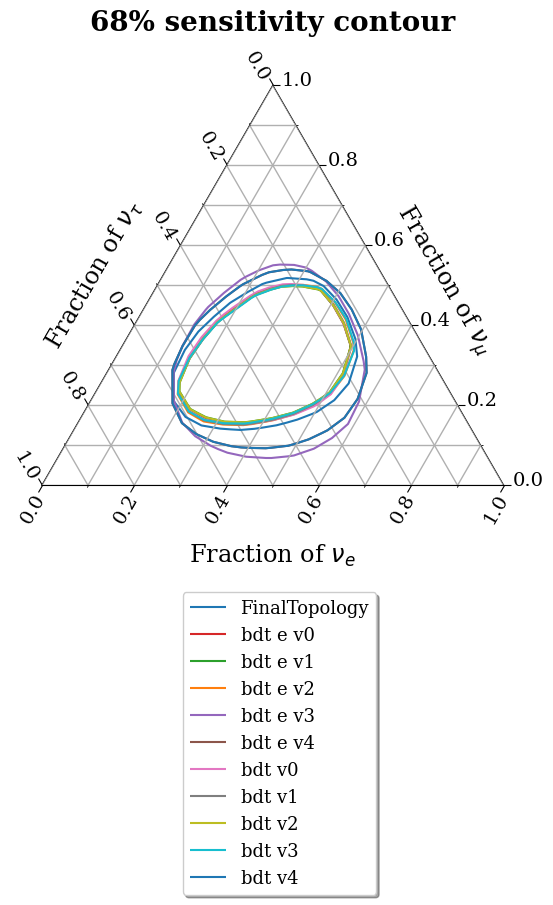

In [46]:
compare_contours( names = ["taureco_v4_FinalTopology_muonTemplateTrack",
                           "taureco_v4_retrain_zheyang_length-10_energy-60e3_v0","taureco_v4_retrain_zheyang_length-10_energy-60e3_v1","taureco_v4_retrain_zheyang_length-10_energy-60e3_v2","taureco_v4_retrain_zheyang_length-10_energy-60e3_v3","taureco_v4_retrain_zheyang_length-10_energy-60e3_v4", 
                           "taureco_v4_retrain_zheyang_length-10_v0","taureco_v4_retrain_zheyang_length-10_v1","taureco_v4_retrain_zheyang_length-10_v2","taureco_v4_retrain_zheyang_length-10_v3","taureco_v4_retrain_zheyang_length-10_v4"], 
                  labels = ["FinalTopology", "bdt e v0", "bdt e v1", "bdt e v2", "bdt e v3", "bdt e v4", "bdt v0", "bdt v1", "bdt v2", "bdt v3", "bdt v4"],
                  output_name = "ftp_FinalTopology_length-10_energy-60e3_bdt-v0-v4_energy-Nan_bdt-v0-v4")

/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


taureco_v4_retrain_zheyang_length-10_energy-60e3_v1
C0
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_bin
C3
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowLen_bin
C2
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin
C1


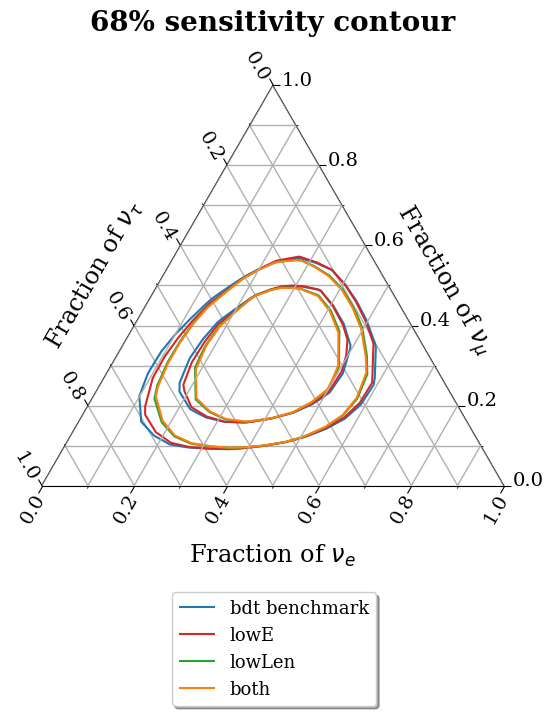

In [57]:
compare_contours( names = ["taureco_v4_retrain_zheyang_length-10_energy-60e3_v1", "taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_bin",
                           "taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowLen_bin", "taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin"], 
                  labels = ["bdt benchmark", "lowE", "lowLen", "both"],
                  output_name = "ftp_length-6.3_energy-60e3_bdt-v1_extra_lowE_lowLen_bin")



/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


taureco_v4_retrain_zheyang_length-10_energy-60e3_v1
C0
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin
C3
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin_muonReweight
C2


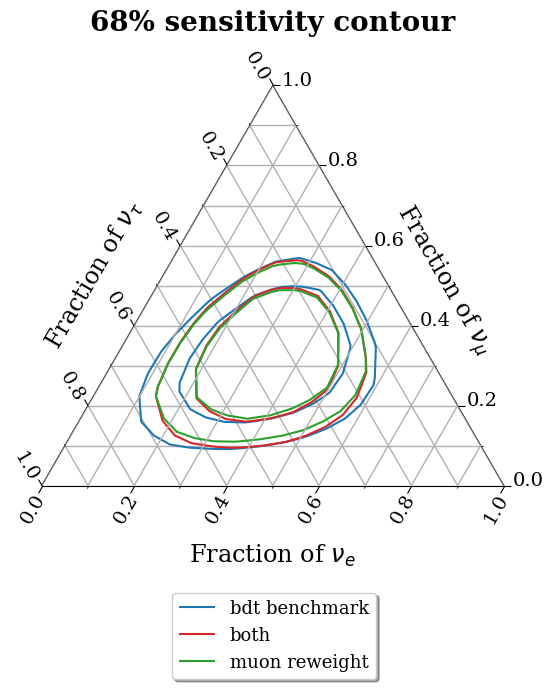

In [66]:
compare_contours( names = ["taureco_v4_retrain_zheyang_length-10_energy-60e3_v1", "taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin", "taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin_muonReweight"], 
                  labels = ["bdt benchmark", "both", "muon reweight"],
                  output_name = "ftp_length-6.3_energy-60e3_bdt-v1_extra_lowE_lowLen_bin_muonReweight")



Lets make some pretty plots

taureco_v4_FinalTopology_muonTemplateTrack
C0
taureco_v4_retrain_zheyang_length-10_energy-60e3_v0
C3
taureco_v4_retrain_zheyang_length-10_energy-60e3_v1
C2
taureco_v4_retrain_zheyang_length-10_energy-60e3_v2
C1
taureco_v4_retrain_zheyang_length-10_energy-60e3_v3
C4
taureco_v4_retrain_zheyang_length-10_energy-60e3_v4
C5
taureco_v4_retrain_zheyang_length-10_v0
C6
taureco_v4_retrain_zheyang_length-10_v1
C7
taureco_v4_retrain_zheyang_length-10_v2
C8
taureco_v4_retrain_zheyang_length-10_v3
C9
taureco_v4_retrain_zheyang_length-10_v4
C9
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_bin
C9
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowLen_bin
C9
taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin
C9


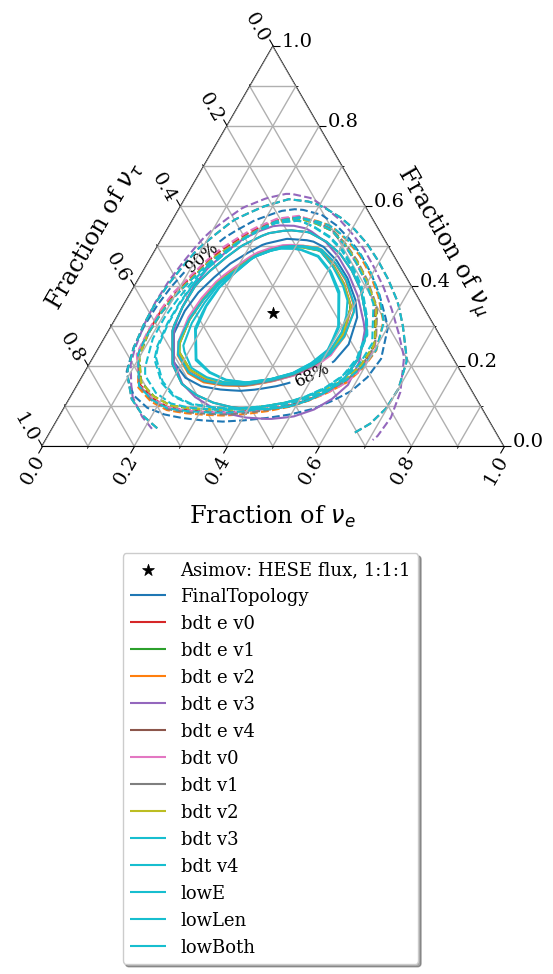

In [59]:
# plots for gr

levels = [2.37, 4.605]#,4.605]#4.605#, 5.99]
levlabels = ['68%', '90%']#'90% CL']#,'95% CL']

fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []

colours = ["C0","C3","C2", "C1", "C4", "C5", "C6", "C7", "C8", "C9", "C9", "C9", "C9", "C9", "C9", "C9", "C9", "C9", "C9", "C9", "C9"]

C = {}

ll = []
lh = []

# best fit
traditional = tax.ca.scatter([1.0/3], [1.0/3], marker='*', facecolor='black',
                  edgecolor='k', lw=0.5, s=80)
lh.append(traditional)
ll.append('Asimov: HESE flux, 1:1:1')

labels = { 
"taureco_v4_FinalTopology_muonTemplateTrack" : "FinalTopology", 
"taureco_v4_retrain_zheyang_length-10_energy-60e3_v0" : "bdt e v0", 
"taureco_v4_retrain_zheyang_length-10_energy-60e3_v1" : "bdt e v1", 
"taureco_v4_retrain_zheyang_length-10_energy-60e3_v2" : "bdt e v2", 
"taureco_v4_retrain_zheyang_length-10_energy-60e3_v3" : "bdt e v3", 
"taureco_v4_retrain_zheyang_length-10_energy-60e3_v4" : "bdt e v4", 

"taureco_v4_retrain_zheyang_length-10_v0" : "bdt v0", 
"taureco_v4_retrain_zheyang_length-10_v1" : "bdt v1", 
"taureco_v4_retrain_zheyang_length-10_v2" : "bdt v2", 
"taureco_v4_retrain_zheyang_length-10_v3" : "bdt v3", 
"taureco_v4_retrain_zheyang_length-10_v4" : "bdt v4", 

"taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_bin" : "lowE",
"taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowLen_bin" : "lowLen", 
"taureco_v4_retrain_zheyang_length-6.3_energy-60e3_v1_extra_lowE_lowLen_bin" : "lowBoth"

 }

fmt={} # set labels to the contours

i = 0

for name in labels: 
# for name in ["HESEBestfit_nosyst"]: 
    
    print(name)
    print(colours[i])
    C[name] = tax.ca.contour(data[name]["ft_grid_asimov_poisson"],
                            data[name]["fe_grid_asimov_poisson"],
                            data[name]["ts_grid_asimov_poisson"], 
                            levels,
                            linestyles=["-","--"],
                            linewidths=1.5,
                            colors=colours[i])
    
    h, _ = C[name].legend_elements()
    lh.append(h[0]) # legend elements
    ll.append(labels[name])

    if i == 0:
        for l, s in zip(C[name].levels, levlabels):
            fmt[l] = s
        plt.clabel(C[name],levels,inline=True,fontsize=12.,
                fmt=fmt,colors='black')


    i+=1


l = fig.legend(lh,ll,
                bbox_to_anchor=(0.77, 0.05),prop=font_legend,
                ncols=1,frameon=True,fancybox=True,shadow=True)
# tax.add_artist(l1)
# plt.title('68% sensitivity contour',y=1.1,fontdict=font_title)    

# plt.savefig(f"{plotting_path}/contour_pretty_ftp_FinalTopology_length-10_energy-60e3_bdt-v0-v1-v2.pdf",bbox_inches='tight')


In [60]:
def polygon_area(x, y):
    # Close path if not already closed
    if x[0] != x[-1] or y[0] != y[-1]:
        x = np.append(x, x[0])
        y = np.append(y, y[0])
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

In [61]:
areas = {}

for name in labels: 
    print(f"Processing {name}")
    contour_obj = C[name]
    area_list = []
    for i, level in enumerate(levels):  # 68%, 90%
        paths = contour_obj.collections[i].get_paths()
        level_area = 0.0
        for p in paths:
            v = p.vertices
            x, y = v[:, 0], v[:, 1]
            level_area += polygon_area(x, y)
        area_list.append(level_area)
        print(f"Area for level {levlabels[i]} ({level}): {level_area:.4f}")
    areas[name] = area_list

# Now calculate and print ratio of areas at 68% CL (index 0) and 90% CL (index 1)
for label in labels:
    for i in range(2):
        # print(label,i)
        ratio = areas[label][i] / areas["taureco_v4_FinalTopology_muonTemplateTrack"][i]
        print(f"Area ratio (new / bench) at {label}: {ratio:.4f}")

Processing taureco_v4_FinalTopology_muonTemplateTrack
Area for level 68% (2.37): 0.1119
Area for level 90% (4.605): 0.2164
Processing taureco_v4_retrain_zheyang_length-10_energy-60e3_v0
Area for level 68% (2.37): 0.0939
Area for level 90% (4.605): 0.1827
Processing taureco_v4_retrain_zheyang_length-10_energy-60e3_v1
Area for level 68% (2.37): 0.0912
Area for level 90% (4.605): 0.1775
Processing taureco_v4_retrain_zheyang_length-10_energy-60e3_v2
Area for level 68% (2.37): 0.0964
Area for level 90% (4.605): 0.1896
Processing taureco_v4_retrain_zheyang_length-10_energy-60e3_v3
Area for level 68% (2.37): 0.1534
Area for level 90% (4.605): 0.2759
Processing taureco_v4_retrain_zheyang_length-10_energy-60e3_v4
Area for level 68% (2.37): 0.1446
Area for level 90% (4.605): 0.2700
Processing taureco_v4_retrain_zheyang_length-10_v0
Area for level 68% (2.37): 0.0958
Area for level 90% (4.605): 0.1858
Processing taureco_v4_retrain_zheyang_length-10_v1
Area for level 68% (2.37): 0.0938
Area for lev

/tmp/ipykernel_3979704/707031105.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contour_obj.collections[i].get_paths()
/tmp/ipykernel_3979704/707031105.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contour_obj.collections[i].get_paths()
/tmp/ipykernel_3979704/707031105.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contour_obj.collections[i].get_paths()
/tmp/ipykernel_3979704/707031105.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contour_obj.collections[i].get_paths()
/tmp/ipykernel_3979704/707031105.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contour_o